# **Wildlife Image Classifier App**

Mount the GDrive in this Google colab

In [31]:
# Code for mounting your Gdrive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import all the important libraries (we will import other necessary libraries later).

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [33]:
import pathlib
data_dir = "/content/drive/MyDrive/wildlife_images"
data_dir = pathlib.Path(data_dir)
new_directory = "/content/drive/MyDrive/animals"


In [34]:
%mkdir /content/drive/MyDrive/animals
%cd /content/drive/MyDrive/animals/
%mkdir fox cheetah hyena lion tiger wolf

mkdir: cannot create directory ‘/content/drive/MyDrive/animals’: File exists
/content/drive/MyDrive/animals
mkdir: cannot create directory ‘fox’: File exists
mkdir: cannot create directory ‘cheetah’: File exists
mkdir: cannot create directory ‘hyena’: File exists
mkdir: cannot create directory ‘lion’: File exists
mkdir: cannot create directory ‘tiger’: File exists
mkdir: cannot create directory ‘wolf’: File exists


In [35]:
image_count = len(list(data_dir.glob('*/*/*')))
print(image_count)

5169


In [ ]:
from PIL import Image
import os

list_labels = ['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']
print(list_labels)

for label in list_labels:
  for img in list(data_dir.glob(label + '-*/*/*')):
    img_base = os.path.basename(img)
    img_name = os.path.splitext(img_base)[0]
    #print(img_name)
    image_path = Image.open(img)
    new_image_path = new_directory + "/" + label + "/" + img_name + ".jpg";
    rgb_im = image_path.convert('RGB')
    rgb_im.save(new_image_path)


#im1 = Image.open(r'path where the PNG is stored\file name.png')
#im1.save(r'path where the JPG will be stored\new file name.jpg')

['cheetah', 'fox', 'hyena', 'lion', 'tiger', 'wolf']


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Load data using a Keras utility

In [36]:
batch_size = 32
img_height = 200
img_width = 200

Doing validation split on dataset to segregate as train data (80%) and test data (20%)

In [37]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  new_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5169 files belonging to 7 classes.
Using 4136 files for training.


In [38]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  new_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 5169 files belonging to 7 classes.
Using 1033 files for validation.


In [39]:
class_names = train_ds.class_names
print(class_names)

['cheetah', 'flagged', 'fox', 'hyena', 'lion', 'tiger', 'wolf']


In [40]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 200, 200, 3)
(32,)


Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Standardize the data

In [ ]:
normalization_layer = layers.Rescaling(1./255)

# CNN Model 1: A Basic Keras Model

In [41]:
num_classes = len(class_names)

cnn_model_1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [42]:
cnn_model_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [43]:
cnn_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 200, 200, 3)       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 100, 100, 16)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 50, 50, 64)       

In [ ]:
epochs=5
history_cnn_model_1 = cnn_model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
130/130 [==============================] - 458s 4s/step - loss: 1.3169 - accuracy: 0.5022 - val_loss: 1.2132 - val_accuracy: 0.5363
Epoch 2/5
130/130 [==============================] - 181s 1s/step - loss: 0.6814 - accuracy: 0.7718 - val_loss: 0.4614 - val_accuracy: 0.8567
Epoch 3/5
130/130 [==============================] - 180s 1s/step - loss: 0.2274 - accuracy: 0.9279 - val_loss: 0.1640 - val_accuracy: 0.9477
Epoch 4/5
130/130 [==============================] - 181s 1s/step - loss: 0.0549 - accuracy: 0.9867 - val_loss: 0.0368 - val_accuracy: 0.9913
Epoch 5/5
130/130 [==============================] - 180s 1s/step - loss: 0.0116 - accuracy: 0.9983 - val_loss: 0.0098 - val_accuracy: 0.9971


# CNN Model 2: Experimenting with Convolutional Pooling Pairs

In [ ]:
cnn_model_2 = Sequential()
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Adding first pair {8C5-P2}
cnn_model_2.add(Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
cnn_model_2.add(MaxPool2D())

# Adding second pair {16C5-P2}
cnn_model_2.add(Conv2D(16, kernel_size=5, padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D())

# Adding third pair {32C5-P2}
cnn_model_2.add(Conv2D(32, kernel_size=5, padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D())

# Adding fourth pair {64C5-P2}
cnn_model_2.add(Conv2D(64, kernel_size=5, padding='same', activation='relu'))
cnn_model_2.add(MaxPool2D())

# Adding fully connected layers
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(6*16, activation="relu"))

In [ ]:
cnn_model_2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 5
history_cnn_model_2 = cnn_model_2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/5
130/130 [==============================] - 160s 1s/step - loss: 5.2496 - accuracy: 0.1997 - val_loss: 4.5643 - val_accuracy: 0.1781
Epoch 2/5
130/130 [==============================] - 157s 1s/step - loss: 4.5644 - accuracy: 0.2036 - val_loss: 4.5643 - val_accuracy: 0.1781
Epoch 3/5
130/130 [==============================] - 159s 1s/step - loss: 4.5644 - accuracy: 0.2036 - val_loss: 4.5643 - val_accuracy: 0.1781
Epoch 4/5
130/130 [==============================] - 159s 1s/step - loss: 4.5644 - accuracy: 0.2036 - val_loss: 4.5643 - val_accuracy: 0.1781
Epoch 5/5
130/130 [==============================] - 158s 1s/step - loss: 4.5644 - accuracy: 0.2036 - val_loss: 4.5643 - val_accuracy: 0.1781


In [ ]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.4 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 106 kB 54.6 MB/s 
     |████████████████████████████████| 84 kB 2.6 MB/s 
     |████████████████████████████████| 55 kB 2.7 MB/s 
     |████████████████████████████████| 278 kB 58.7 MB/s 
     |████████████████████████████████| 2.3 MB 41.2 MB/s 
     |████████████████████████████████| 84 kB 3.2 MB/s 
     |████████████████████████████████| 213 kB 62.7 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 68 kB 6.5 M

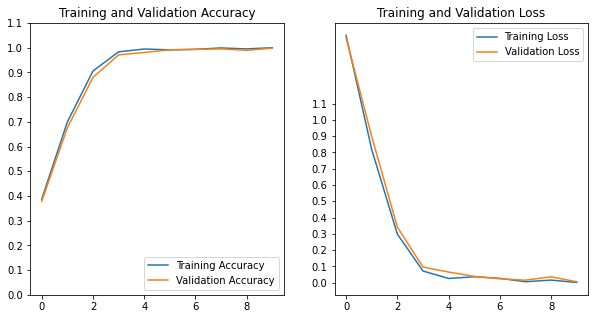

In [ ]:
acc = history_cnn_model_1.history['accuracy']
val_acc = history_cnn_model_1.history['val_accuracy']

loss = history_cnn_model_1.history['loss']
val_loss = history_cnn_model_1.history['val_loss']

y_ticks = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1])
epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.yticks(y_ticks)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.yticks(y_ticks)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
import glob
from sklearn.model_selection import train_test_split
import os

data = []
labels = []

classes = {}
classes_dir = enumerate(os.listdir(new_directory))
for i, j in classes_dir:
    classes[j] = i
print(classes)


for i in class_names: 
  image_dir = glob.glob(new_directory + "/" + i + "/*")
  print(i)
  for j in image_dir:
    image=tf.keras.preprocessing.image.load_img(j, color_mode='rgb', 
    target_size= (200,200))
    image=np.array(image)
    data.append(image)
    labels.append(classes[i])
  #print(labels)
  

data = np.array(data)
labels = np.array(labels)
#print(labels)

X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)
                                                

{'fox': 0, 'cheetah': 1, 'hyena': 2, 'lion': 3, 'tiger': 4, 'wolf': 5, 'flagged': 6}
cheetah
flagged
fox
hyena
lion
tiger
wolf


# **Support Vector Machine**

In [130]:
svm_model = Sequential()
svm_model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(200,200,3)))
svm_model.add(MaxPool2D(pool_size=(6,6),strides = 6))

svm_model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=3))
svm_model.add(MaxPool2D(pool_size=(6,6),strides = 6))

svm_model.add(Flatten())
svm_model.add(Dense(128,activation="relu"))

#Output layer
svm_model.add(Dense(6,kernel_regularizer=tf.keras.regularizers.L1(0.01),activation = "softmax"))

In [131]:
svm_model.compile(optimizer='adam',
              loss=tf.keras.losses.SquaredHinge(),
              metrics=['accuracy'])

In [ ]:
epochs = 10
history_svm_model = svm_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Import all necessory classifiers.

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

Reshape the trained and validation dataset

In [55]:
np.unique(ytrain)
nsamples, nx, ny, nz = X_train.shape
X_train_modified = X_train.reshape((nsamples,nx*ny*nz))
nsamples, nx, ny, nz = X_test.shape
X_test_modified = X_test.reshape((nsamples,nx*ny*nz))

# **Random Forest Classifier**

In [51]:
## Random Forest Classification
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_modified,ytrain)
random_forest_model_prdiction = random_forest_model.predict(X_test_modified)
accuracy_score(random_forest_model_prdiction,ytest)
print("Report of Random Forest Classification - ")
print(classification_report(random_forest_model_prdiction,ytest))

Report of Random Forest Classification - 
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       146
           1       0.99      0.97      0.98       224
           2       1.00      0.98      0.99       172
           3       0.99      0.99      0.99       156
           4       0.96      0.99      0.97       169
           5       0.98      0.95      0.96       167

    accuracy                           0.98      1034
   macro avg       0.98      0.98      0.98      1034
weighted avg       0.98      0.98      0.98      1034



# **KNN Classifier**

In [60]:
## KNN classification
knn_classifier_model = KNeighborsClassifier(n_neighbors=10)
knn_classifier_model.fit(X_train_modified,ytrain)
knn_classifier_prediction = knn_classifier_model.predict(X_test_modified)
accuracy_score(knn_classifier_prediction,ytest)
print("Report of KNN Classification - ")
print(classification_report(knn_classifier_prediction,ytest))

Report of KNN Classification - 
              precision    recall  f1-score   support

           0       0.43      0.39      0.41       167
           1       0.59      0.45      0.51       292
           2       0.46      0.36      0.40       212
           3       0.65      0.42      0.51       241
           4       0.07      0.75      0.13        16
           5       0.38      0.58      0.46       106

    accuracy                           0.43      1034
   macro avg       0.43      0.49      0.40      1034
weighted avg       0.52      0.43      0.46      1034



# **Decision Tree Classifier**

In [58]:
## Decision Tree Classification
decision_tree_classifier_model = DecisionTreeClassifier()
decision_tree_classifier_model.fit(X_train_modified,ytrain)
decision_tree_prediction = decision_tree_classifier_model.predict(X_test_modified)
accuracy_score(decision_tree_prediction,ytest)
print("Report of Decision Tree Classification - ")
print(classification_report(decision_tree_prediction,ytest))

Report of Decision Tree Classification - 
              precision    recall  f1-score   support

           0       0.72      0.80      0.76       137
           1       0.82      0.78      0.80       233
           2       0.79      0.73      0.76       184
           3       0.76      0.74      0.75       161
           4       0.63      0.72      0.67       153
           5       0.77      0.75      0.76       166

    accuracy                           0.75      1034
   macro avg       0.75      0.75      0.75      1034
weighted avg       0.76      0.75      0.75      1034



# **Comparing Different Models**

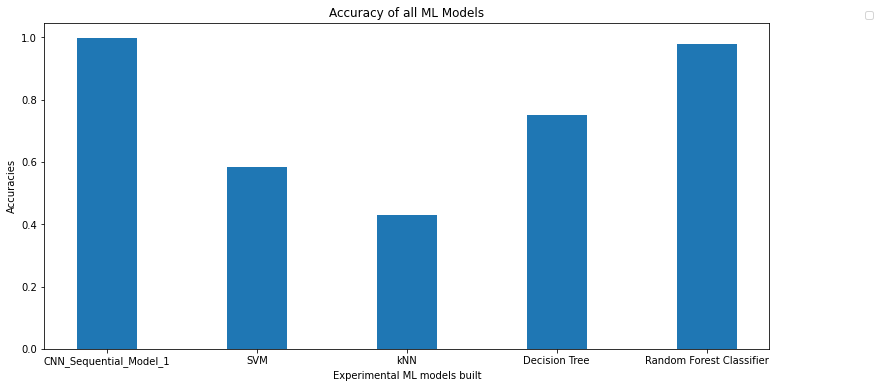

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

models = ['CNN_Sequential_Model_1', 'SVM', 'kNN', 'Decision Tree', 'Random Forest Classifier']
val_accuracies = [0.9971, 0.58345, 0.43, 0.75, 0.98] # hardcoded the results from the output of report/history
X_axis = np.arange(len(models))
fig = plt.figure(figsize = (13, 6))
 
# creating the bar plot
plt.bar(X_axis, val_accuracies, width = 0.4)
plt.xticks(X_axis, models)
plt.xlabel("Experimental ML models built")
plt.ylabel("Accuracies")
plt.title("Accuracy of all ML Models")
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()

In [134]:
def predict_wildlife_image(model_choice, image_to_classify):
  if str(image_to_classify) == "CNN Sequential Model":
    wildlife_image_4d = image_to_classify.reshape(-1,200,200,3)
    prediction = cnn_model_1.predict(wildlife_image_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(6)}
  elif str(image_to_classify) == "kNN":
    wildlife_image_4d = image_to_classify.reshape(-1,200,200,3)
    prediction = knn_classifier_model.predict(wildlife_image_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(6)}
  elif str(image_to_classify) == "SVM":
    wildlife_image_4d = image_to_classify.reshape(-1,200,200,3)
    prediction = svm_model.predict(wildlife_image_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(6)}
  elif str(image_to_classify) == "Random Forest Classifier":
    wildlife_image_4d = random_forest_model.reshape(-1,200,200,3)
    prediction = knn_classifier_model.predict(wildlife_image_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(6)}
  elif str(image_to_classify) == "Decision Tree":
    wildlife_image_4d = decision_tree_classifier_model.reshape(-1,200,200,3)
    prediction = knn_classifier_model.predict(wildlife_image_4d)[0]
    return {class_names[i]: float(prediction[i]) for i in range(6)}


image = gr.inputs.Image(shape=(200,200))
label = gr.outputs.Label(num_top_classes=6)
title = "Wildlife Image Classifier App"
description = "CSE5334 - Final Project: This is a wildlife image classifier app which classifies an uploaded image to one of the six classes as - Cheetah, Fox, Hyena, Wolf, Lion and Tiger"

gr.Interface(fn=predict_wildlife_image, inputs=[gr.inputs.Dropdown(["CNN Sequential Model", "kNN", "SVM", "Random Forest Classifier", "Decision Tree"]), image], outputs=label, title=title, description=description).launch(debug='True')

/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)
/usr/local/lib/python3.8/dist-packages/gradio/inputs.py:216: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.wa

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
